# Prelab 03

## Fitting damped harmonic oscillator transients

The code below will generate data to fit. This will allow us to test the fitting code and make sure we understand it's limitations and how the data interacts with it. You can change the parameters as well as the spacing of points. Play around with the frequency and spacing and see how this changes your perception of the data.

In [1]:
from common import *

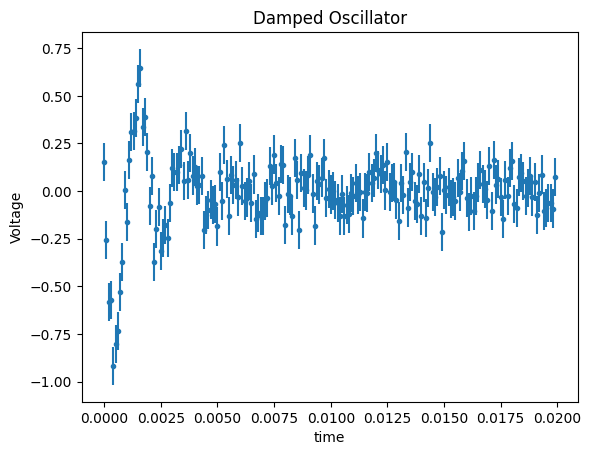

In [2]:
# Code to calculate and plot the transient response of a damped, harmonic oscillator

# import the  necessary libraries and rename them
import numpy as np
import array
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image


# Define the Parameter Names, and give them numerical values

param_names = ["amplitude", "tau", "resonant-freq", "phase"]
input = (1, 0.002, 500, np.pi/2)

# set the range and spacing of points in the generated data
start=0.0
end=0.02
spacing=0.0001
uncertainty=0.1 #set an uncertainty in V

# Define the Function for the Harmonic Oscillator Transient

def fit_function(x, amplitude, tau, resonantf, phase):
    return amplitude * np.exp(-x/tau) * np.cos(2.0*np.pi * resonantf * x + phase)


# Define a set of x values that will be used for the calculation
# Note that in your fitting code, x is defined differently 
#  - do not change that part of the fitting code when you get there.

x = np.arange(start, end, spacing)
y_err = uncertainty * np.ones(len(x))
noise = (uncertainty)*np.random.randn(len(x)) # generates normally distributed scatter 

y = fit_function(x, *input)+noise


plt.errorbar(x,y,yerr=y_err,marker='.',linestyle="")
plt.xlabel("time")
plt.ylabel("Voltage")
plt.title("Damped Oscillator")

# save and plot image 
plt.savefig("DampedOscillator1.jpeg")
plt.show()

Now try fitting the data you've just generated. Since you're not reading a file in this time, the code is already modified to directly read the arrays above, but you will need to set up the inputs to use the appropriate function. Try using the same "guesses" as you input as the parameters, as well as parameters that are very different to see how the routine responds. Start by generating a dense grid of data, where by eye you can clearly see the oscillations, then try sparse data. If your guesses are exact, the fit will likely still return similar values, but if you change the guesses the fit will find a new local minimum.

In [3]:
gopts=VOLTAGE_VERSUS_TIME_GRAPH_OPTIONS

In [4]:
model=RingdownFitParameters(
    amplitude=1,
    time_constant=0.002,
    resonant_frequency=450,
    phase=0
)

results = autofit_without_packing(x, y, y_err, gopts, model)
results.tabulate()

+--------------------+-----------+---------------+
| Measurement        |     Value |   Uncertainty |
+====================+===========+===============+
| amplitude          |   0.9954  |     0.06736   |
+--------------------+-----------+---------------+
| time_constant      |   0.00209 |     0.0001939 |
+--------------------+-----------+---------------+
| resonant_frequency | 490.7     |     6.318     |
+--------------------+-----------+---------------+
| phase              |   1.553   |     0.05634   |
+--------------------+-----------+---------------+
Chi^2 = 0.948


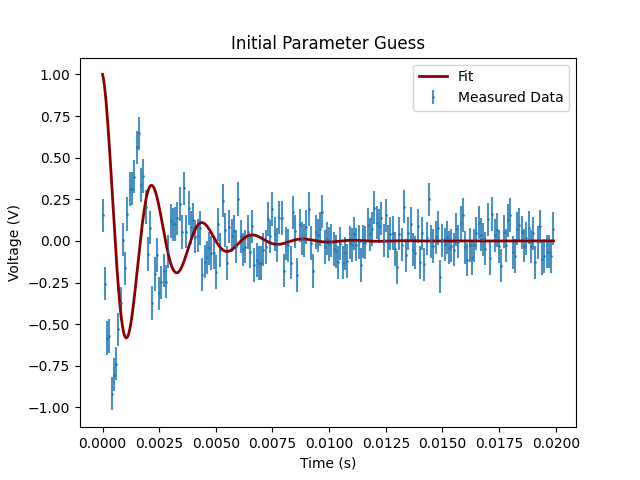

In [5]:
display(results.initial_guess_graph)

In [ ]:
display(results.initial_guess_residuals_graph)

In [ ]:
display(results.autofit_graph)

In [ ]:
display(results.autofit_residuals_graph)

### Advice to self for fitting

Describe what you found as you changed the density of points and guesses. Give yourself some advice for how to set yourself up for success when taking data, and setting up the analysis.

- the more dense the data is, the better of a fit, but changes to the time constant need to be made
- autogenerated data is almost always perfect for modeling with slight errors
- higher uncertainty doesn't necessarily make a better fit, so it's important to properly estimate uncertainty!

## Analyzing noise

Let's take a bit closer look at how we are treating noise. The "Data Pack and Trim" routine we've given you uses the ($1\sigma$) standard deviation of your selected region to determine the noise. If your noise is gaussian, which it often is if you have fluctuating values, then this is very reasonable. However, you have probably seen that for some of your data in Experiments 1 or 2 sometimes you just see bit noise where the values are mostly constant, but sometimes jump to another mostly constant value. This comes from the digitization of the data, and depending on the acquisition parameters can overwhelm any gaussian noise present in the system.

This bit noise works like any other digital noise: the "true" value lies somewhere between with equal probablility since we simply have no way to tell. Formally this can be treated as a "boxcar" distribution of possible values and should be given an uncertainty of $\frac{1}{2}\delta_{resolution}/\sqrt{3}$ which is the standard deviation of this boxcar distribution with a width given by the resolution.

In Experiment 3 your data will have a fairly large dynamic range: the initial response to a kick will be large, and you'll want as much of the ringdown as you can use. With a large signal, and some filtering or averaging within the oscillsocope you are very likely to see digitization/bit noise this week.

### Digital noise example

Load the sample data file `LRC2CH1.csv` and isolate the first flat segment to examine the noise.

In [ ]:
raw_data, data = load_raw_data('LRC2CH1.csv', trim_range=(4995,5015), 
                     plot=True, graphing_options=gopts)

In [ ]:
std_dev = calculate_uncertainty(raw_data, method="default", 
                                indices_range=(0,5000),
                                y_range=(0.437,0.443),
                                plot=True, graphing_options=gopts)

In [ ]:
packed_data = pack_data(data, std_dev, p=3, 
                        plot=True, graphing_options=gopts)

Now, look at the data, and look at the standard deviation. Do you believe the uncertainty in this measurement corresponds to the standard deviation given here? Comment on the value.

The standard deviation doesn't seem to adequately represent the uncertainty, because the data is almost uniform. In this case, a digital uncertainty seems more accurate.

Another factor is the resolution of the oscilloscope on this particular vertical sensitivity. The data here rarely changes enough to even show any other values, but because it happens to here, we can determine the resolution from the bits jumped between. The Data Pack and Trim package has an option to analyze the "digital" noise (i.e. resolution limited) with the formula above. Try it now... change the `uncertainty` variable (on line 29) to the string `digital` and look at the output. Compare this to the standard deviation.

In [ ]:
digital_uncertainty = calculate_uncertainty(data, method="digital")

In [ ]:
packed_data = pack_data(data, digital_uncertainty, p=3, 
                        plot=True, graphing_options=gopts)

Which uncertainty, the standard deviation or the digital resolution uncertainty seems more appropriate here? Why?

The digital resolution seems much better. The model would fit considerably better with these greater uncertainties, whereas with the previous estimate, no model would be able to sufficiently match that data.

## Creating arrays and adding to them (Optional)

In experiment 4, we'll use a limited spreadsheet-like interface (you may have seen it in 119), but if you want to store data that's being output by other parts of the code, you can create an array of that data on the fly. We'll use a numpy array because that will also allow us to do calculations and array operations.

To create a numpy array we use the command: `np.array()`
Only the first argument is required, and it needs to itself be an array.
These are defined within square brackets with elements separated by commas: `[element1,element2,...]`
A higher dimensional array is created by nesting the square brackets: `[[element11,element12],[element21,element22]]`
and so on.

Let's try it.

In [ ]:
import numpy as np

A = np.array([1,2,3]) # a 1D array of dimension 1x3
print("A =",A)

B = np.array([[1],[2],[3]]) # a 2D array of dimension 3x1
print("B =",B)

C = np.array([[11,12,13],[21,22,23]]) # a 2x3 2D array (a matrix
print("C =",C)

Z = np.zeros((4,2)) # a 4x2 2D array of zeros, the dimensions need to be specified in brackets except in 1D
print("Z =",Z)

If you want the first (ahem, the zeroth) element, you can specify that element and pull it out as a separate variable

In [ ]:
a=A[0] # only need to specify the index
print("a =",a)

b=B[0,0] # a vertical array needs to be treated like a 2D array, 
#and specify the index of the row, and column, otherwise it returns a vector of 1 element
print("b =",b)

c=C[0,0]
print("c =",c)

We can also replace a particular value by redefining the value for that index, and if you start with an array of zeros of the correct size, this is a good way to store data (but you need to know the final size of the array you expect):

In [ ]:
A[0]=0
print("A =",A)

Z[0]=[1,0.1]
Z[1]=[2,0.2]
Z[2,1]=0.3
Z[3,0]=4
print("Z =",Z)

Now, let's make this more interesting! What if we want to add values to an existing array? We can "append" them. To do this we can use the `np.append(array, values, axis)` function. This requires specifying the array we want to add to, the values to be added, and which axis to add them to, being careful that the dimensions match.

In [ ]:
A = np.append(A, [4], axis=0) # this will update the original array A with one more element
print("A =",A)

C1 = np.append(C, [[31,32,33]], axis=0) # this will add another row to array C and store it as C1
print("C1 =",C1)

C2 = np.append(C, [[14],[24]], axis=1) # this will add another column to array C and store it as C2
print("C2 =",C2)

Now, run the cell above again! You will see that the array `A` continues to expand with the same additional element because we just redefined the variable! This can be useful for keeping a running tally of parameters, but you do have to be careful not to keep appending every time you run a cell (say to do something else).

### Make some arrays and modify them

Now you try... (note you will probably want to print out some intermediate steps so you can check that you're doing what you think you are doing!)
* Create an array of zeros that is 2 x 5 and store it as a variable name
* Modify the first row to have values `[3,3]` and the 2rd row to have `[2,1.5]`
* Add `6.2` to all elements of the array
* Mulitply all elements by `10`
* Append another row containing values `[16,8.8]`
* Print the value of the 2nd row, 2nd column

### Let's make an array of some of the parameters from our fitting...

Run the code we used at the start a few more times with different point spacing and initial guesses. We'll store the point spacing, initial frequency, the output fit frequency, and the $\chi^2$ as we go for each run. We'll start by pulling the last values you used above to set up the arrays.

In [ ]:
realfreq=np.array([input[2]]) # the frequency is the 2nd element of the input array
ptspacing=np.array([spacing])
fitfreq=np.array([fit_params[2]]) # the frequency is again the 2nd element
fitfreq_err=np.array([fit_params_error[2]]) # and we'll store the uncertainty as well
chisquared=np.array([chi2])

In [ ]:
print("Real frequency:",realfreq)
print("Point spacing:",ptspacing)
print("Fit frequency:",fitfreq)
print("Chi squared:",chisquared)

Now, change some parameters (point spacing, initial guesses) and we'll append the results!

In [ ]:
# Code to calculate and plot the transient response of a damped, harmonic oscillator

# import the  necessary libraries and rename them
import numpy as np
import array
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image


# Define the Parameter Names, and give them numerical values

param_names = ["amplitude", "tau", "resonant-freq", "phase"]
input = (1, 0.002, 500, np.pi/2)

# set the range and spacing of points in the generated data
start=0.0
end=0.02
spacing=0.0008

uncertainty=0.01 #set an uncertainty in V

# Define the Function for the Harmonic Oscillator Transient

def fit_function(x, amplitude, tau, resonantf, phase):
    return amplitude * np.exp(-x/tau) * np.cos(2.0*np.pi * resonantf * x + phase)


# Define a set of x values that will be used for the calculation
# Note that in your fitting code, x is defined differently 
#  - do not change that part of the fitting code when you get there.

x = np.arange(start, end, spacing)
y_err = uncertainty*np.ones(len(x))
noise = (uncertainty)*np.random.randn(len(x)) # generates normally distributed scatter 

y = fit_function(x, *input)+noise


plt.errorbar(x,y,yerr=y_err,marker='.',linestyle="")
plt.xlabel("time")
plt.ylabel("Voltage")
plt.title("Damped Oscillator")

# save and plot image 
plt.savefig("DampedOscillator1.jpeg")
plt.show()

In [ ]:
# Load python packages
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

###############################################################################
# DEFINED FITTING FUNCTIONS
###############################################################################

def sine_func(x, amplitude, freq, phase):
    return amplitude * np.sin(2.0 * np.pi * freq * x + phase)

def offset_sine_func(x, amplitude, freq, phase, offset):
    return (amplitude * np.sin(2.0 * np.pi * freq * x + phase)) + offset

def exponential_func(x, amplitude, tau, voffset):
    return amplitude * np.exp(x/(-1.0*tau)) + voffset

def ringdown_function(x, amplitude, tau, resonantf, phase):
    return amplitude * np.exp(-x/tau) * np.cos(2.0*np.pi * resonantf * x + phase)

def linear_func(x, slope, intercept):
    return slope * x + intercept

###############################################################################
# LIST OF ALL INPUTS
###############################################################################

# Name of the data file
#fname = "sintest2_pack.csv"

# Names and units of data columns from fname
x_name = "Time"
x_units = "s"
y_name = "Voltage"
y_units = "V"

# Modify to change the fitting function, parameter names and to set initial parameter guesses
fit_function = ringdown_function
param_names = ("amplitude", "tau", "resonantf", "phase")
guesses = (1, 0.002, 200, 0.0)

# Flags for optional features
show_covariance_matrix = False
set_xy_boundaries = False
lower_x = -0.01 # these values ignored if set_xy_boundaries = False
upper_x = 0.01
lower_y = -1
upper_y = 1

###############################################################################
# LOAD DATA
###############################################################################

# load the file fname and skip the first 'skiprows' rows
#data = np.loadtxt(fname, delimiter=",", comments="#", usecols=(0, 1, 2, 3), skiprows=2)

# Assign the data file columns to variables for later use
#x = data[:, 0]
#y = data[:, 2]
#y_sigma = data[:, 3]
y_sigma=y_err

###############################################################################
# INITIAL PLOT OF THE DATA
###############################################################################

# Define 500 points spanning the range of the x-data; for plotting smooth curves
xtheory = np.linspace(min(x), max(x), 500)

# Compare the guessed curve to the data for visual reference
y_guess = fit_function(xtheory, *guesses)
plt.errorbar(x, y, yerr=y_sigma, marker=".", linestyle="", label="Measured data")
plt.plot(
    xtheory,
    y_guess,
    marker="",
    linestyle="-",
    linewidth=1,
    color="g",
    label="Initial parameter guesses",
)
plt.xlabel(f"{x_name} [{x_units}]")
plt.ylabel(f"{y_name} [{y_units}]")
plt.title(r"Comparison between the data and the intial parameter guesses")
plt.legend(loc="best", numpoints=1)
plt.show()

# calculate the value of the model at each of the x-values of the data set
y_fit = fit_function(x, *guesses)

# Residuals are the difference between the data and theory
residual = y - y_fit

# Plot the residuals
plt.errorbar(x, residual, yerr=y_sigma, marker=".", linestyle="", label="residuals")
plt.xlabel(f"{x_name} [{x_units}]")
plt.ylabel(f"Residual y-y_fit [{y_units}]")
plt.title("Residuals using initial parameter guesses")
plt.show()

###############################################################################
# PERFORM THE FIT AND PRINT RESULTS
###############################################################################

# Use curve_fit to perform the fit
# fit_function: defined above to choose a specific fitting function 
# fit_params: holds the resulting fit parameters
# fit_cov: the covariance matrix between all the parameters
#          (used to extract fitting parameter uncertanties)
# maxfev=10**5: maximum number of fitting procedure iterations before giving up
# absolute_sigma=True: uncertainties are treated as absolute (not relative)
fit_params, fit_cov = curve_fit(
    fit_function, x, y, sigma=y_sigma, 
    p0=guesses,absolute_sigma=True, maxfev=10**5)

# Define the function that calculates chi-squared
def chi_square(fit_parameters, x, y, sigma):
    dof = len(x) - len(fit_params)
    return np.sum((y - fit_function(x, *fit_parameters)) ** 2 / sigma**2)/dof

# Calculate and print reduced chi-squared
chi2 = chi_square(fit_params, x, y, y_sigma)
print("Chi-squared = ", chi2)

# Calculate the uncertainties in the fit parameters
fit_params_error = np.sqrt(np.diag(fit_cov))

# Print the fit parameters with uncertianties
print("\nFit parameters:")
for i in range(len(fit_params)):
    print(f"   {param_names[i]} = {fit_params[i]:.3e} ± {fit_params_error[i]:.3e}")
print("\n")

# (Optional) Print the covariance between all variables
if show_covariance_matrix:
    print("Covariance between fit parameters:")
    for i, fit_covariance in enumerate(fit_cov):
        for j in range(i+1,len(fit_covariance)):
            print(f"   {param_names[i]} and {param_names[j]}: {fit_cov[i,j]:.3e}")
    print("\n")

# residual is the difference between the data and model
x_fitfunc = np.linspace(min(x), max(x), len(x))
y_fitfunc = fit_function(x_fitfunc, *fit_params)
y_fit = fit_function(x, *fit_params)
residual = y-y_fit

###############################################################################
# PRODUCE A MULTIPANEL PLOT, WITH SCATTER PLOT, RESIDUALS AND RESIDUALS HISTOGRAM
###############################################################################

# The size of the canvas
fig = plt.figure(figsize=(7,15))

# The scatter plot
ax1 = fig.add_subplot(311)
ax1.errorbar(x,y,yerr=y_sigma,marker='.',linestyle='',label="Measured data")
ax1.plot(x_fitfunc, y_fitfunc, marker="", linestyle="-", linewidth=2,color="r", label="Fit")
ax1.set_xlabel(f"{x_name} [{x_units}]")
ax1.set_ylabel(f"{y_name} [{y_units}]")
ax1.set_title('Best Fit of Function to Data')

# (Optional) set the x and y boundaries of your plot
if set_xy_boundaries:
    plt.xlim(lower_x,upper_x)
    plt.ylim(lower_y,upper_y)
# Show the legend. loc='best' places it where the date are least obstructed
ax1.legend(loc='best',numpoints=1)

# The residuals plot
ax2 = fig.add_subplot(312)
ax2.errorbar(x, residual, yerr=y_sigma,marker='.', linestyle='', label="Residual (y-y_fit)")
ax2.hlines(0,np.min(x),np.max(x),lw=2,alpha=0.8)
ax2.set_xlabel(f"{x_name} [{x_units}]")
ax2.set_ylabel(f"y-y_fit [{y_units}]")
ax2.set_title('Residuals for the Best Fit')
ax2.legend(loc='best',numpoints=1)

# Histogram of the residuals
ax3 = fig.add_subplot(313)
hist,bins = np.histogram(residual,bins=30)
ax3.bar(bins[:-1],hist,width=bins[1]-bins[0])
ax3.set_ylim(0,1.2*np.max(hist))
ax3.set_xlabel(f"y-y_fit [{y_units}]")
ax3.set_ylabel('Number of occurences')
ax3.set_title('Histogram of the Residuals')

# Save a copy of the figure as a png 
plt.savefig('FittingResults.png')

# Show the plot
plt.show()

Now let's append these new values to the array!

In [ ]:
realfreq=np.append(realfreq,[input[2]],axis=0)
ptspacing=np.append(ptspacing,[spacing],axis=0)
fitfreq=np.append(fitfreq,[fit_params[2]],axis=0)
fitfreq_err=np.append(fitfreq_err,[fit_params_error[2]],axis=0)
chisquared=np.append(chisquared,[chi2],axis=0)

And print out our new array:

In [ ]:
print("Real frequency:",realfreq)
print("Point spacing:",ptspacing)
print("Fit frequency:",fitfreq)
print("Fit frequency uncert:",fitfreq_err)
print("Chi squared:",chisquared)

This is far from elegant, and when appending you need to take care not to accidentally add additional entries and scramble your data, but it's an easy way to start keeping track of parameter output as you go. Alternatively you can set up a suitably sized array of zeros using `np.zeros` from the start and slot in your entries, though this requires knowing in advance how large an array to make.